<a href="https://colab.research.google.com/github/Sobiarana81/sdk-codegen/blob/master/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task One 

* Scalar
* Vector
* Matrix
* Tensor

__Installing PyTorch__

 * conda install pytorch torchvision cudatoolkit=10.0 -c pytorch


In [1]:
import torch

In [2]:
torch.__version__

'1.8.0+cu101'

In [3]:
torch.cuda.is_available()

False

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Coverting to Tensor and Back to Numpy

__Tensor Operations:__
* Mean
* Sted
* Max , Min
* Add , Multp

In [5]:
import numpy as np


x = np.random.rand(100, 1)

In [6]:
x_tensor = torch.from_numpy(x).float().to(device)

__-- Differentiation in PyTorch: Autograd__



* y = w*x + b

In [7]:
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

y = b + w * x_tensor


__-- Computation Model: Dynamic Computation Graph__

In [8]:
!pip install torchviz

     |████████████████████████████████| 51kB 4.1MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp37-none-any.whl size=3520 sha256=5752d21b4a3a84de2ea3d0708d6d8acf2f9fbfd1ef4be073445ad9040dbe2fc2
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


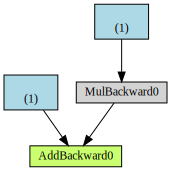

In [9]:
from torchviz import make_dot
make_dot(y)

# Task Two

  __Optimizer:__
torch.optim.Adadelta , torch.optim.Adagrad , torch.optim.RMSprop and the torch.optim.Adam.

  __Loss:__ 

-Mean Absolute Error: _torch.nn.L1Loss_

-Mean Square Error Loss: _torch.nn.MSELoss_

-Smooth L1 Loss: _torch.nn.SmoothL1Loss_

-Negative Log-Likelihood Loss: _torch.nn.NLLLoss_

-Cross-Entropy Loss: _torch.nn.CrossEntropyLoss_

-Kullback-Leibler divergence: _torch.nn.KLDivLoss_

In [10]:
import numpy as np
import torch
import torch.optim as optim

- b = 3
- w = -4

In [11]:
x_train = np.random.rand(100, 1)
y_train = 3 -4 * x_train + .1 * np.random.randn(100, 1)

In [12]:
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [13]:
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

In [14]:
lr = 1e-1
n_epochs = 1000

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

for epoch in range(n_epochs):
    yhat = b + w * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    loss.backward()    
    
    # No more manual update!
    # with torch.no_grad():
    #     a -= lr * a.grad
    #     b -= lr * b.grad
    optimizer.step()
    
    # No more telling PyTorch to let gradients go!
    # a.grad.zero_()
    # b.grad.zero_()
    optimizer.zero_grad()
    
print(b, w)

tensor([3.0009], requires_grad=True) tensor([-4.0222], requires_grad=True)


# Task Three

* __nn.Moudule__

__Layers:__
nn.Linear, nn.Conv2d, nn.MaxPool2d, nn.ReLU, nn.BatchNorm2d, nn.Dropout, nn.Embedding, nn.GRU/nn.LSTM, nn.Softmax, nn.LogSoftmax, nn.MultiheadAttention, nn.TransformerEncoder, nn.TransformerDecoder

In [15]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn


class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "a" and "b" real parameters of the model, we need to wrap them with nn.Parameter
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x):
        # Computes the outputs / predictions
        return self.b + self.w * x

In [16]:
torch.manual_seed(42)

# Now we can create a model and send it at once to the device
model = ManualLinearRegression().to(device)
# We can also inspect its parameters using its state_dict
print(model.state_dict())

lr = 1e-1
n_epochs = 1000

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    
    model.train()

    # No more manual prediction!
    # yhat = a + b * x_tensor
    yhat = model(x_train_tensor)
    
    loss = loss_fn(y_train_tensor, yhat)
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    
print(model.state_dict())

OrderedDict([('b', tensor([0.3367])), ('w', tensor([0.1288]))])
OrderedDict([('b', tensor([3.0009])), ('w', tensor([-4.0222]))])


# Task Four

* __Dataset__
* __Dataloader__

In [17]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [19]:
## parameter denoting the batch size
BATCH_SIZE = 32

## transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

## download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

## download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

HTTPError: ignored

In [20]:
print(trainset)
print(testset)

NameError: ignored

# Task Five : Building Neural Network

* Manually building weights and biases
* Extending the torch.nn.Model Class
* Using torch.nn.Sequential

In [ ]:
import torch.nn.functional as F

In [ ]:
## the model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.d1 = nn.Linear(28 * 28, 128)
        self.dropout = nn.Dropout(p=0.2)
        self.d2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.flatten(start_dim = 1)
        x = self.d1(x)
        x = F.relu(x)
        x = self.dropout(x)
        logits = self.d2(x)
        out = F.softmax(logits, dim=1)
        return out

In [ ]:
learning_rate = 0.001
num_epochs = 5

model = MyModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
## function to compute accuracy
def get_accuracy(output, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(output, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [ ]:

## train the model
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    ## commence training
    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        predictions = model(images)
        loss = criterion(predictions, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(predictions, labels, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i)) 

In [ ]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))